<a href="https://colab.research.google.com/github/geedhaipriyan/Data-Lit/blob/master/homework_assignment_analyzing_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART I

In [13]:
import pandas as pd
# Read in data and examine first 10 rows
print("PART I BEST PERFORMING AITLINE",end="\n\n")
flights = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv')
airlines = []
print("LIST OF AIRLINES IN OPERATION",end="\n\n")
for i in flights['name']:
  if i not in airlines: 
            airlines.append(i)
for j in airlines:
  print(j)
print(" ",end="\n\n")
print("DATA FORMAT")

print()
flights.describe()

PART I BEST PERFORMING AITLINE

LIST OF AIRLINES IN OPERATION

United Air Lines Inc.
American Airlines Inc.
JetBlue Airways
Delta Air Lines Inc.
ExpressJet Airlines Inc.
Envoy Air
US Airways Inc.
Southwest Airlines Co.
Virgin America
AirTran Airways Corporation
Alaska Airlines Inc.
Endeavor Air Inc.
Frontier Airlines Inc.
Hawaiian Airlines Inc.
Mesa Airlines Inc.
SkyWest Airlines Inc.
 

DATA FORMAT



,Unnamed: 0,arr_delay
count,317113.000000,317113.000000
mean,167477.171794,1.297143
std,97760.209641,29.064401
min,0.000000,-60.000000
25%,81769.000000,-17.000000
50%,166816.000000,-6.000000
75%,252451.000000,11.000000
max,336769.000000,120.000000


Text(0, 0.5, 'Flights')

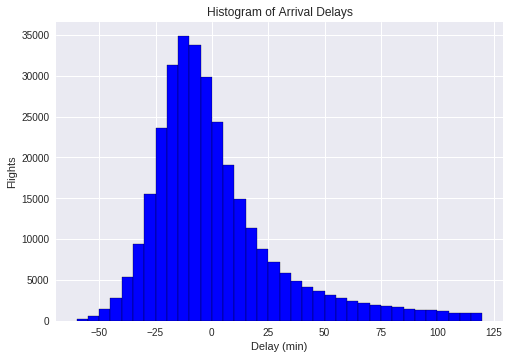

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#visualising arrival delay in bindwidth of 5 minutes
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

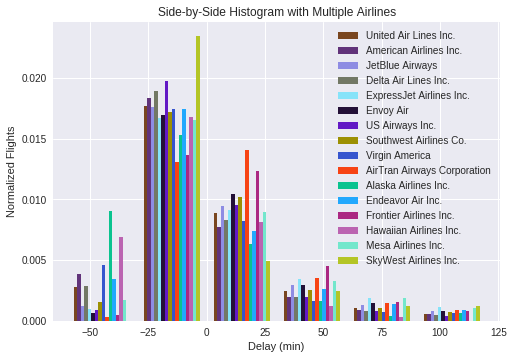

In [30]:
import random
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(airlines))]
x=[]
for j in range(len(airlines)):
  x.append(list(flights[flights['name']==airlines[j]]['arr_delay']))
plt.hist(x, bins = int(180/30), normed=True,
         color = colors, label=airlines)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

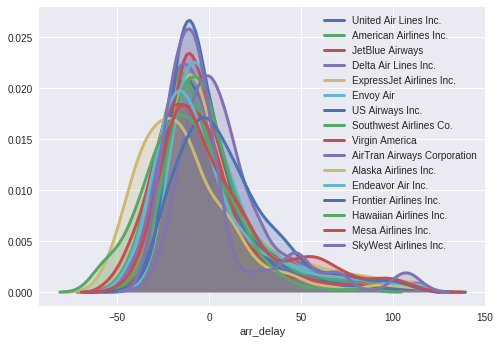

In [37]:

for airline in airlines:
        sns.distplot(flights[flights['name']==airline]['arr_delay'],
                     hist=False,
                     kde=True,
                     kde_kws={'shade':True, 'linewidth':3},
                     label=airline,
                    )
    
   

# Alaska Airlines Inc is most often arrives before time since its graph mostly towards left.

# PART II
# Rules/Aspects of Central Limit Thoeram 
 -> The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.

->The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)

 ->The spread of the sampling distribution is related to the spread of the population values (mean= μ, std dev = σ/sqrt(n))

 ->Bigger samples lead to a smaller spread in the sampling distribution (self evident from std dev = sigma/sqrt(n) )

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


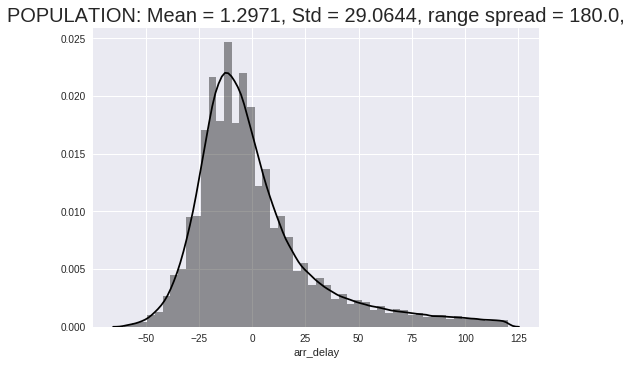

In [22]:
# part 2
# Rules/Aspects of Central Limit Thoeram

# The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.
# The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)
# The spread of the sampling distribution is related to the spread of the population values (mean= μ, std dev = σ/sqrt(n))
# Bigger samples lead to a smaller spread in the sampling distribution (self evident from std dev = sigma/sqrt(n) )

from math import sqrt
import numpy as np
population = flights.arr_delay

populationmean = flights['arr_delay'].mean()
populationstd = flights['arr_delay'].std()

plt.title('POPULATION: Mean = {}, Std = {}, range spread = {},'.\
              format(np.round(populationmean,decimals=4), np.round(populationstd,decimals=4),np.round(population.max()-population.min(),decimals=4)), fontsize=20)
sns.distplot(flights['arr_delay'], color='black')

# RULE I  The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn

-> As you can see from below plots mean distributions plots are less spread than the population distribution plot

# RULE 2:
->  Sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes) can be seen from below plots

# RULE 3:
-> specified in below plots

# RULE 3:
-> specified in below plots as range spread, can be seen by comparing sample distributions.
mostly in all samples std dev = sigma/sqrt(n)

RULE 2 :
 ->

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


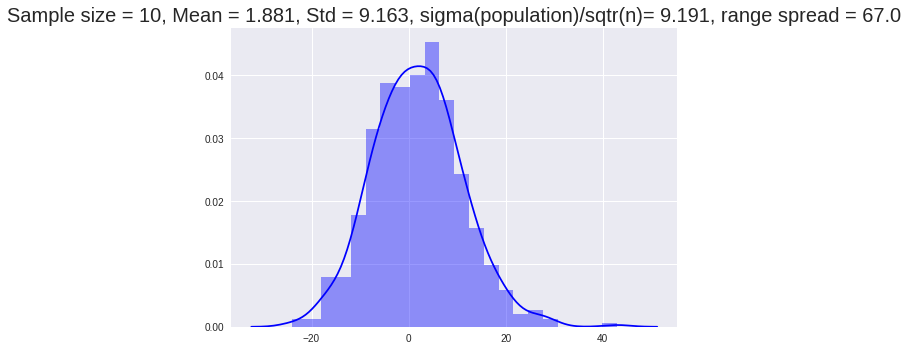

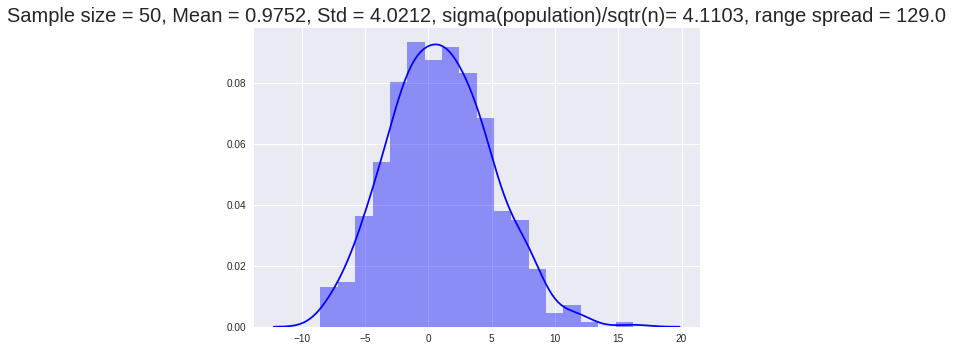

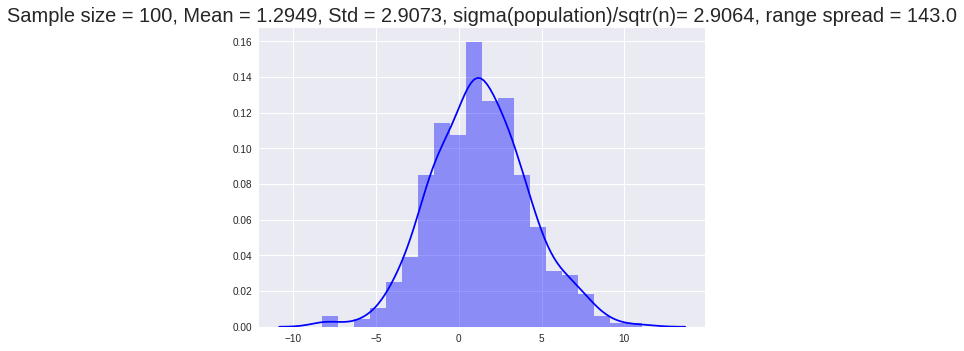

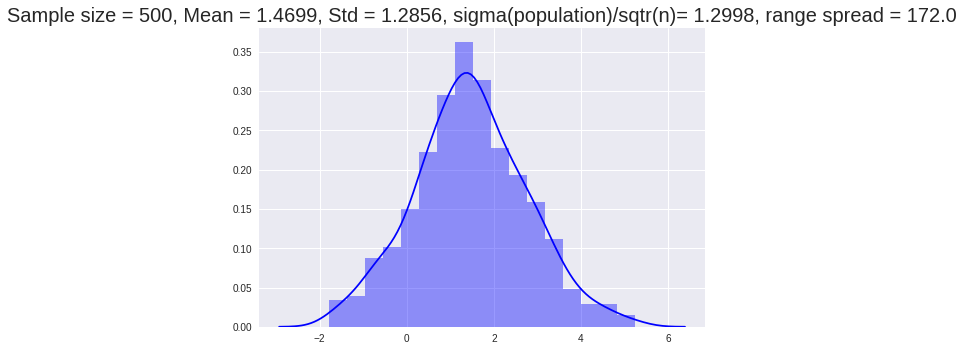

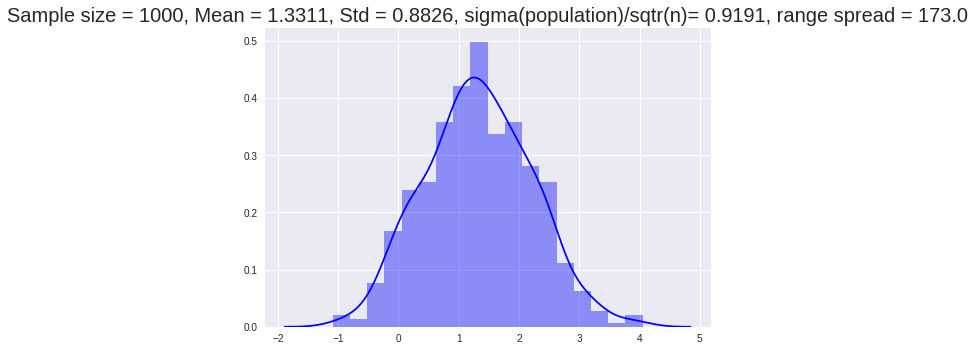

In [38]:
SAMPLE_SIZES = [10, 50, 100, 500, 1000]


for i, n in enumerate(SAMPLE_SIZES):

    samplemeans = []
    for j in range(500):
        sample = np.random.choice(flights['arr_delay'], size=n)
        samplemeans.append(np.average(sample))

    averagemean = np.average(samplemeans)
    std = np.std(samplemeans)
    stddev = populationstd/ sqrt(n)
    
    plt.subplots()
    plt.title('Sample size = {}, Mean = {}, Std = {}, sigma(population)/sqtr(n)= {}, range spread = {}'.\
              format(n, np.round(averagemean,decimals=4), np.round(std,decimals=4), np.round(stddev,decimals=4), np.round(sample.max()-sample.min(),decimals=4)), fontsize=20)

    sns.distplot(samplemeans, color='blue')